
# Project: No show appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 I will investigate the no show appointment data set and explore if we can predict the possibility of a patient showing up or not showing up for an appointment based on the independent variables. I chose No_show column to be my depend variable and independent variables as Age, SMS_received, Scholarship, appointment day & scheduled day.

I will explore the below question in the course of analysis:

1. Is there a relationship between showing up for an appointment and receiving an sms reminder?
2. Does waiting time(days) influence appointment attendance?
3. Does Gender influence appointment attendance?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading dataset and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dataset was loaded and stored to dataframe Df, printed the first 5 rows of the dataframe. 

Column Description:

**Patientid** - this the unique identifier of the patients who visited the hospitals

**AppointmentID** - this the unique number given to the patients for each appointment scheduled

**Gender** - Male or Female

**Scheduleday** - day the appointment was scheduled

**Appointmentday** - day of the appointment

**Age** - age of the patient

**Neighborhood** - the location of the hospital patient attended

**Scholarship** - the patient is a beneficiary of the government health insurance sponsorship

**Hypertension** - the patient has a history of hypertension

**Diabetes** - the patient is diabetic

**Alcoholism** - the patient is an alcoholic

**Handicap** - the patient is handicapped

**SMS_received** - sms reminder sent to patient of the appointment date

**No_show** - Yes for appointment attended, No for appointment not attended

In [3]:
df.shape

(110527, 14)

Dataframe has 110527 rows and 14 columns

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above statistics: 
>average age of patient is 37, maximum age is 115. More investigation on minimum age will be done in the data cleaning as its shows -1

>9.8 % of the patients are beneficiaries of the government medical sponsorship

>20% of the patients have hypertension 

>7% of the patients are diabetitic

>3% of the patients have are alcoholic

>2% of the patients have are handicapped, maximum handicapped is 4, this will be investigated at data cleaning stage as ought to    be yes - 1 and no - 0

>32% of the patients received sms reminders for their appointments

>No values for the **No_show** column as its data type is string, this will be changed to int in data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Dataset has no null value. No_show column data type is string, this will be changed to numeric for easy computation as it is our depend variable. 
>appointmentDay & scheduledDay should be converted to date data type in order to get difference which is the waiting days
>Age, Scholarship, Hypertension, SMS_received will be converted to boolean for easy computation

### Rename columns

In [6]:
# rename Hipertension to Hypertension, Handcap to Handicap
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)

#confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>Changing the typo in the names will make it easy when analyzing the columns

In [7]:
# replace hyphen with underscores for the dataset
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

# confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>changed column No_show to ease our work when exploring our questions

In [8]:
# extract only the Year/Month/Day

df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]


In [9]:
#covert to datetime
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

#confirm datatypes
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

>I am intrested in getting the appointment waiting time in days.Both columns we extrated the Year/Month/Day and then converted to datetime. Difference between the two columns will give us WaitingDays column

In [10]:
#replacing No_show column with values [0,1]

df.No_show.replace(to_replace=['No', 'Yes'], value=[0, 1])

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 110527, dtype: int64

>converted to the column to numeric in order to better manipulate our depend variable

In [11]:
#check for unique values in all the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No_show                2
dtype: int64

>PatientId value counts are 62299 meaning there are patients who hand more than one appointment. Hospitals are located at 81 different locations.
>Handicap column will be investigated further as the unique values are 5, whireleas they ought to be 2.

In [12]:
#unique values in the handicap column
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

Handicap column has 5 unique values, these should be two (0 & 1). Values > 1 will be assigned value 1

In [13]:
df.loc[df.Handicap > 1, 'Handicap'] = 1

#confirming if the unique values are 0 & 1
df.Handicap.value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

In [14]:
# converting columns to boolean 
cols = ['Scholarship', 'Hypertension', 'Diabetes','Handicap', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')

#confirm changes
df[cols].dtypes

Scholarship     bool
Hypertension    bool
Diabetes        bool
Handicap        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [15]:
#creating new column WaitingDays
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0 days


In [16]:
df['WaitingDays'] = df['WaitingDays'].dt.days.astype('int16')


>Column WaitingDays was in date time and hence the first row value of 0 days, Column was converted to int

In [17]:
#confirm the column changes above
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0


In [18]:
#record with Age as -1
df.loc[(df.Age < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,No,0


The above row will be dropped as it is not significant compared to the number of rows 110527

In [19]:
# drop row 99832
delete_row = df.loc[(df.Age < 0)].index
df = df.drop(delete_row)

We shall also not use coumns PatientId & AppointmentID in our exploratory data analyis and hence we shall drop the columns permanently in our dataframe.

In [20]:
#droping columns PatientId & AppointmentID
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [21]:
#confirming if the columns are dropped
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0


In [22]:
# creating group column Agegroup

bin_edges = [0,14,18,35,60,115]

bin_names = ['Children','Teen', 'Youth', 'Adults', 'Seniors']

df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# confirming the column is added
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,AgeGroup
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0,Seniors


> Agegroup will be used in exploratory data analysis stage

<a id='eda'></a>
## Exploratory Data Analysis



#### Histogram for Various features

,Patients
AgeGroup,
Children,19718
Teen,5609
Youth,24137
Adults,37761
Seniors,19762


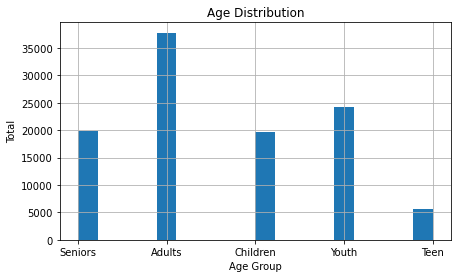

In [23]:
ax = df['AgeGroup'].hist(figsize=(7,4), grid=True, bins = 18,)
ax.set_title('Age Distribution')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total')
df.groupby(['AgeGroup'])[['No_show']].count().rename(columns={'No_show':'Patients'})

Majority of the patients are adults

,SMS_sent,Total
0,False,75044
1,True,35482


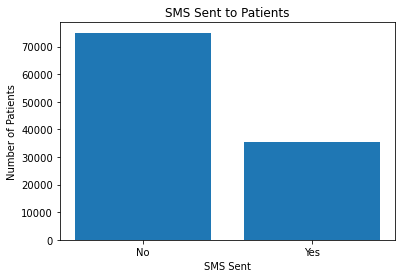

In [24]:
# The number of patients who received sms plot
sms = df.SMS_received.value_counts()
heights = [sms[0], sms[1]]
labels = ['No', 'Yes']
plt.bar(labels, heights, tick_label=labels)
plt.title('SMS Sent to Patients')
plt.xlabel('SMS Sent')
plt.ylabel('Number of Patients');
df.SMS_received.value_counts().reset_index(name='Total').rename(columns={'index':'SMS_sent'})

 75,044 Patients did not receive SMS and 35,482 patients received SMS

,Scholarship,Total
0,False,99665
1,True,10861


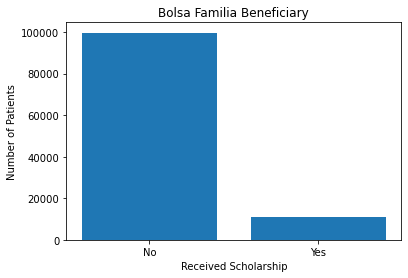

In [39]:
# Patients who were on scholorship

heights = [ df.Scholarship.value_counts()[0], df.Scholarship.value_counts()[1]]
labels = ['No', 'Yes']
plt.bar(labels, heights, tick_label=labels)
plt.title('Bolsa Familia Beneficiary')
plt.xlabel('Received Scholarship')
plt.ylabel('Number of Patients');
df.Scholarship.value_counts().reset_index(name='Total').rename(columns={'index':'Scholarship'})

99665 patients are not beneficiaries of the Bolsa familia scheme, only 10861 are enrolled.

,Neighbourhood,Total
0,JARDIM CAMBURI,7717
1,MARIA ORTIZ,5805
2,RESISTÊNCIA,4431
3,JARDIM DA PENHA,3877
4,ITARARÉ,3514
5,CENTRO,3334


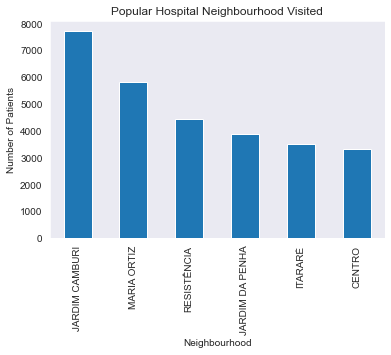

In [68]:
sns.set_style("dark")
df.Neighbourhood.value_counts()[0:6].plot(kind="bar")
plt.title("Popular Hospital Neighbourhood Visited")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Patients")
df.Neighbourhood.value_counts()[0:6].reset_index(name='Total').rename(columns={'index':'Neighbourhood'})

,Attended Appointment,Total
0,No,88207
1,Yes,22319


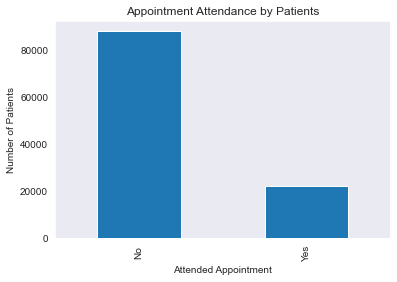

In [25]:
sns.set_style("dark")
df.No_show.value_counts().plot(kind="bar")
plt.title("Appointment Attendance by Patients")
plt.ylabel("Number of Patients")
plt.xlabel('Attended Appointment')
df.No_show.value_counts().reset_index(name='Total').rename(columns={'index':'Attended Appointment'})

Only 22319 patients attended their appointment out of the 110527 patients

,Patients
Gender,
F,71839
M,38687


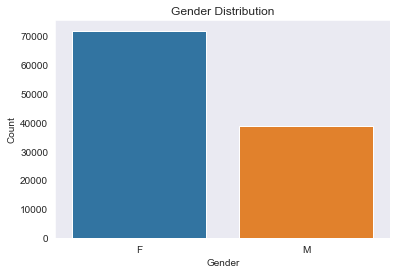

In [31]:
ax = sns.countplot(x = 'Gender', data = df)
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
df.groupby(['Gender'])[['No_show']].count().rename(columns={'No_show':'Patients'})

From the above chart and statitics, Female patients are more than male patients.

#### Does receiving sms affect attendance of appointments

This question will help us find out if sending an SMS appointment reminder to a patient is more likely to influence them to show up for their appointments.

In [82]:
sms = df.groupby(['SMS_received','No_show']).No_show.count().reset_index(name='Total')
sms

,SMS_received,No_show,Total
0,False,No,62509
1,False,Yes,12535
2,True,No,25698
3,True,Yes,9784


From the above statistics,Proportions are appropriate here in order to get the true statitics of the two groups,those who received & did not receive SMS

,SMS_received,No_show,Proportion of the Patient
0,False,No,0.832965
1,False,Yes,0.167035
2,True,No,0.724255
3,True,Yes,0.275745


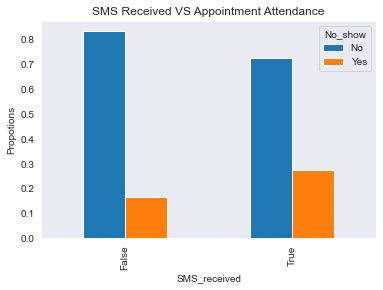

In [79]:
ax = df.groupby('SMS_received').No_show.value_counts(normalize=True).unstack().plot.bar()
ax.set_title('SMS Received VS Appointment Attendance')
ax.set_ylabel('Propotions')
df.groupby('SMS_received').No_show.value_counts(normalize=True).reset_index(name='Proportion of the Patient')

From the plots & statitics above patients who did not receive appointment SMS showed up more than the those who received the sms

##### Does gender affect attendance of appointments

The question will help us determine which gender, male or female is likely to show up for appointments. From the data explorotary stage, we discovered there are more female patient than male patients hence proportions, groupby() and bar graphs were used in analyzing the data. 

,Gender,No_show,Count
0,F,No,0.796851
1,F,Yes,0.203149
2,M,No,0.800321
3,M,Yes,0.199679


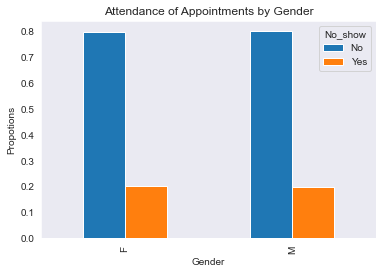

In [27]:
df.groupby(['Gender']).No_show.value_counts(normalize=True).unstack().plot.bar()
plt.title('Attendance of Appointments by Gender')
plt.ylabel('Propotion')
df.groupby(['Gender']).No_show.value_counts(normalize=True).reset_index(name='Count')

From above plot Gender does not affect the attendance of appointments.

#### Does waiting time affect attendance of appointments

This question will help us find out if the waiting time affected the attendance of appointments by the patients. 
Waiting time was calculated as the difference between AppointmentDay and scheduledDay. 
Aggregate function groupby() and pie charts were used to analyze the data.

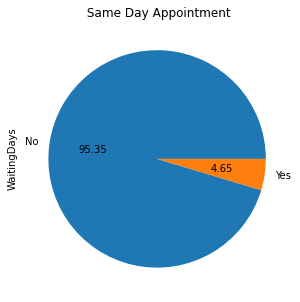

,No_show,Total
0,No,36770
1,Yes,1792


In [48]:
#Waiting days less than one Month

df[df['WaitingDays'] == 0].groupby("No_show")['WaitingDays'].count().plot(figsize=(6,5),kind="pie",autopct='%.2f',title=" Same Day Appointment")
plt.show()
df[df['WaitingDays'] == 0].groupby("No_show")['WaitingDays'].count().reset_index(name='Total')

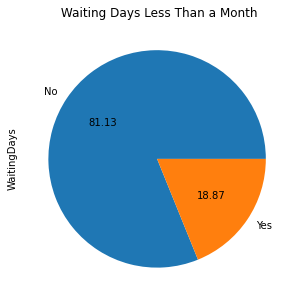

,No_show,Total
0,No,81254
1,Yes,18894


In [49]:
# Appointment days less or equal to one month
df[df['WaitingDays'] <= 30].groupby("No_show")['WaitingDays'].count().plot(figsize=(6,5),kind="pie",autopct='%.2f',title=" Waiting Days Less Than a Month")
plt.show()
df[df['WaitingDays'] <= 30].groupby("No_show")['WaitingDays'].count().reset_index(name='Total')

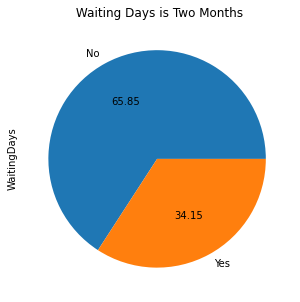

,No_show,Total
0,No,5454
1,Yes,2829


In [50]:
# Appointment days is more more than one month but less than or equals to 2 months
df[(df['WaitingDays'] > 30) & (df['WaitingDays'] <= 60)].groupby("No_show")['WaitingDays'].count().plot(figsize=(6,5),kind="pie",autopct='%.2f',title=" Waiting Days is Two Months")
plt.show()
df[(df['WaitingDays'] > 30) & (df['WaitingDays'] <= 60)].groupby("No_show")['WaitingDays'].count().reset_index(name='Total')

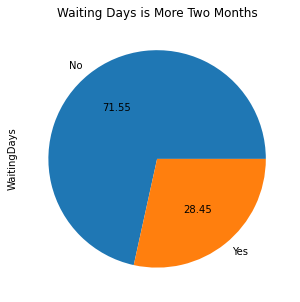

,No_show,Total
0,No,1499
1,Yes,596


In [51]:
# Appointment days is more than 2 months
df[df['WaitingDays']>60].groupby('No_show')['WaitingDays'].count().plot(figsize=(6,5),kind="pie",autopct='%.2f',title="Waiting Days is More Two Months")
plt.show()
df[df['WaitingDays']>60].groupby('No_show')['WaitingDays'].count().reset_index(name='Total')

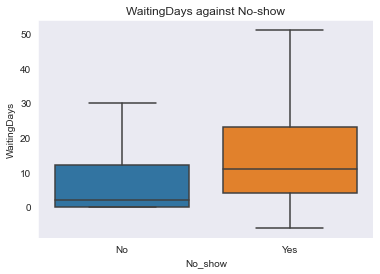

,mean,std
No_show,,
No,8.754759,14.550450
Yes,15.831489,16.605912


In [42]:
# checking the correlation between Waitingdays and No_show.
sns.boxplot(x = 'No_show', y = 'WaitingDays', data = df, showfliers = False)
plt.title('WaitingDays against No-show')
plt.show()
pd.DataFrame(df.groupby(['No_show'])['WaitingDays'].describe().loc[:, ['mean','std']])

From the above pie charts & statistics, As the waiting days increase we observe a decrease in the number of patients that attended their scheduled appointments. 
>95% of the patients showed up for appointments sheduled the same day.

>81% of the patient showed up for appointments scheduled one month or less.

>66% of the patients showed up for appointments scheduled 2 months.

>71% for appointments scheduled for more than two months.

From the boxplot, its shows there is correlation between the number of waiting days and the attendance of appointments. For 0-10 days patients tend to show up for appointments.

<a id='conclusions'></a>
## Conclusions


1. Receiving SMS reminders did not influence attandance of appointment. 83% of patients who did not receive SMS showed up for the appointment while 72% of those who received SMS showed up, 26% of those who received SMS did not show up.

2. Gender did not affect appointment attendance, approximately an equal number of Male & Female showed up and did not show up for appointments.

3. Waiting time influenced if the patient showed up for appointments. 95% of the patients showed up for appointments sheduled the same day. 81% of the patient showed up for appointments scheduled one month or less, 66% of the patients showed up for appointments scheduled 2 months and 71% for appointments scheduled for more than two months.

Future analysis can investigate the effects if having a scholarship, disease and handicap can affect attendance of appointments by patients.

### Limitations

The analysis did not have more and relevant data in order to analyze why patients who were not sent reminder SMS showed up more than those who received the reminder SMS.